In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC


In [ ]:
# Memuat dataset dari string CSV yang diberikan
df = pd.read_csv('/content/cluster_.csv')
df.head()

,ipk_smt1,ipk_smt2,ipk_smt3,ipk_smt4,ipk_smt5,ipk_smt6,ipk_smt7,ipk_smt8,kehadiran_mk1,kehadiran_mk2,...,online_activity1,online_activity2,online_activity3,online_activity4,online_activity5,online_activity6,status_pekerjaan,beban_kerja,sosial_ekonomi,cluster
0,3.049671,2.666174,3.134769,3.662303,2.606585,2.606586,3.697921,3.206743,80.253053,90.454256,...,1.543771,3.798717,3.031425,5.509198,3.058770,2.346565,Paruh Waktu,-0.022578,Menengah,1
1,4.006753,2.607525,2.755562,2.501092,2.334901,3.257570,2.839936,2.400831,85.439829,83.585228,...,2.304033,7.067181,10.369686,7.473847,5.417137,6.788435,Penuh Waktu,36.969890,Menengah,0
2,3.772148,3.218016,2.753936,3.065712,2.304362,2.053696,1.842408,2.031492,91.332308,75.961168,...,3.297555,4.752083,7.881434,2.689367,6.780379,5.181253,Paruh Waktu,0.135624,Menengah,1
3,4.042799,3.240353,2.476164,2.855488,2.096140,2.763804,2.716417,3.386464,99.738025,90.882190,...,5.335711,6.347789,6.348173,5.619151,2.049824,6.891540,Tidak Bekerja,0.032875,Menengah,1
4,3.177024,2.701327,2.369708,2.666864,3.039795,2.587234,3.130789,1.943649,76.329612,79.926106,...,3.619772,3.983871,5.640405,2.288619,3.717458,4.725755,Paruh Waktu,-0.007445,Rendah,1


In [ ]:
# Menampilkan informasi dasar dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ipk_smt1          2500 non-null   float64
 1   ipk_smt2          2500 non-null   float64
 2   ipk_smt3          2500 non-null   float64
 3   ipk_smt4          2500 non-null   float64
 4   ipk_smt5          2500 non-null   float64
 5   ipk_smt6          2500 non-null   float64
 6   ipk_smt7          2500 non-null   float64
 7   ipk_smt8          2500 non-null   float64
 8   kehadiran_mk1     2500 non-null   float64
 9   kehadiran_mk2     2500 non-null   float64
 10  kehadiran_mk3     2500 non-null   float64
 11  kehadiran_mk4     2500 non-null   float64
 12  kehadiran_mk5     2500 non-null   float64
 13  kehadiran_mk6     2500 non-null   float64
 14  retake            2500 non-null   float64
 15  online_activity1  2500 non-null   float64
 16  online_activity2  2500

In [ ]:
# One-Hot Encoding untuk kolom kategorikal
categorical_cols = ['status_pekerjaan', 'sosial_ekonomi']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Pisahkan fitur (X) dan label (y)
X = df.drop(columns=['cluster'])  # 'Cluster' adalah label hasil clustering
y = df['cluster']

# Memisahkan data menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Verifikasi bentuk data
print("Data Training:")
print(f"Fitur: {X_train.shape}, Label: {y_train.shape}")
print("\nData Testing:")
print(f"Fitur: {X_test.shape}, Label: {y_test.shape}")

Data Training:
Fitur: (2000, 26), Label: (2000,)

Data Testing:
Fitur: (500, 26), Label: (500,)


In [ ]:
# Latih Model Logistic Regression
logreg = LogisticRegression(solver='saga', max_iter=500, random_state=42)
logreg.fit(X_train, y_train)  # Tanpa normalisasi ulang

# Prediksi
y_pred = logreg.predict(X_test)

print("\nModel Logistic Regression telah selesai dilatih!\n")



Model Logistic Regression telah selesai dilatih!



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Prediksi
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Evaluasi akurasi training & testing
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)


# EVALUASI

Akurasi Model: 0.924

Laporan Klasifikasi Logistic Regression :
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       101
           1       0.95      0.95      0.95       399

    accuracy                           0.92       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.92      0.92      0.92       500

Akurasi Training: 0.9220
Akurasi Testing : 0.9240


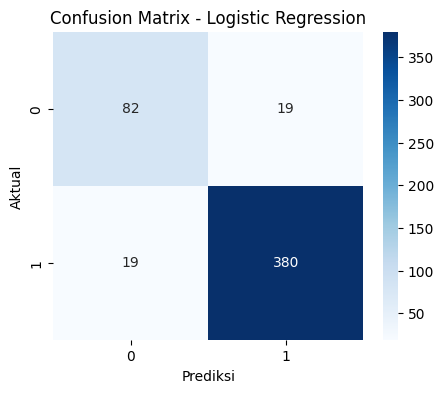

In [ ]:
# Evaluasi Model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi Logistic Regression :\n", classification_report(y_test, y_pred))

train_accuracy_lr = accuracy_score(y_train, logreg.predict(X_train)) # kalkulasi training
print(f"Akurasi Training: {train_accuracy_lr:.4f}")
print(f"Akurasi Testing : {accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



 Evaluasi SVM  
Akurasi Training: 0.9225
Akurasi Testing : 0.9260

Laporan Klasifikasi SVM:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       101
           1       0.95      0.95      0.95       399

    accuracy                           0.93       500
   macro avg       0.88      0.89      0.89       500
weighted avg       0.93      0.93      0.93       500



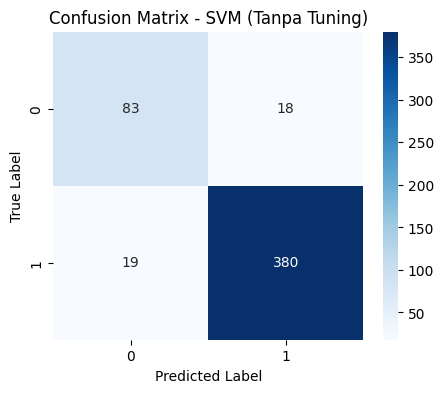

In [ ]:
# Output hasil evaluasi
print("\n Evaluasi SVM  ")
print(f"Akurasi Training: {train_accuracy_svm:.4f}")
print(f"Akurasi Testing : {test_accuracy_svm:.4f}")
print("\nLaporan Klasifikasi SVM:\n", classification_report(y_test, y_test_pred_svm))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM (Tanpa Tuning)")
plt.show()

In [ ]:
import joblib
# Simpan model Logistic Regression
joblib.dump(logreg, 'logistic_regression_model.pkl')
print("Model Logistic Regression disimpan sebagai 'logistic_regression_model.pkl'")

# Simpan model SVM
joblib.dump(svm_model, 'svm_model.pkl')
print("Model SVM disimpan sebagai 'svm_model.pkl'")


Model Logistic Regression disimpan sebagai 'logistic_regression_model.pkl'
Model SVM disimpan sebagai 'svm_model.pkl'
